In [1]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [8]:
data['Gender'] = pd.get_dummies(data['Gender'],drop_first=True)

In [12]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


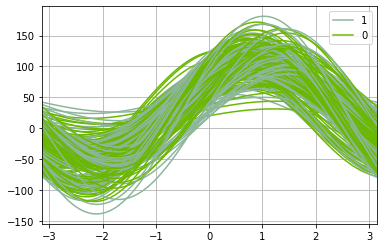

In [13]:
x = pd.plotting.andrews_curves(data, 'Gender')
x.plot()
plt.show()

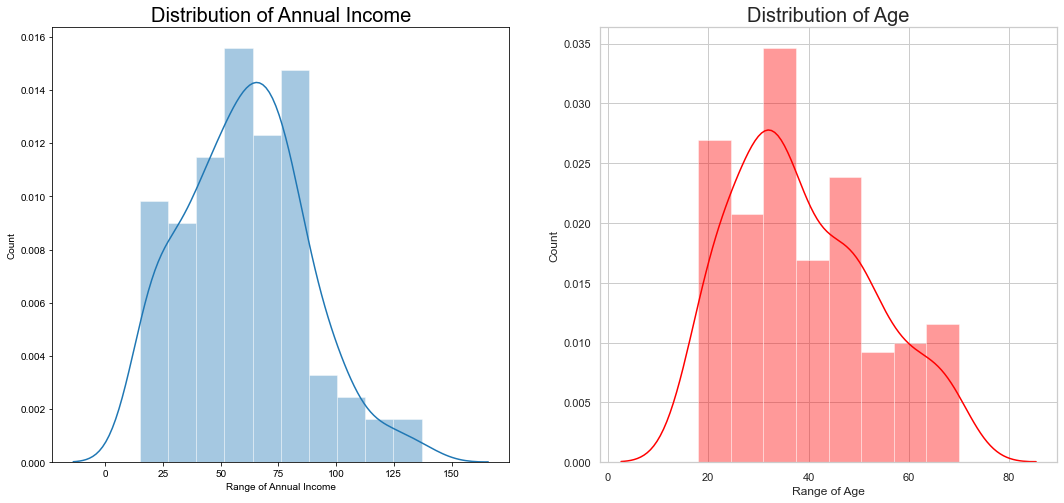

In [14]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

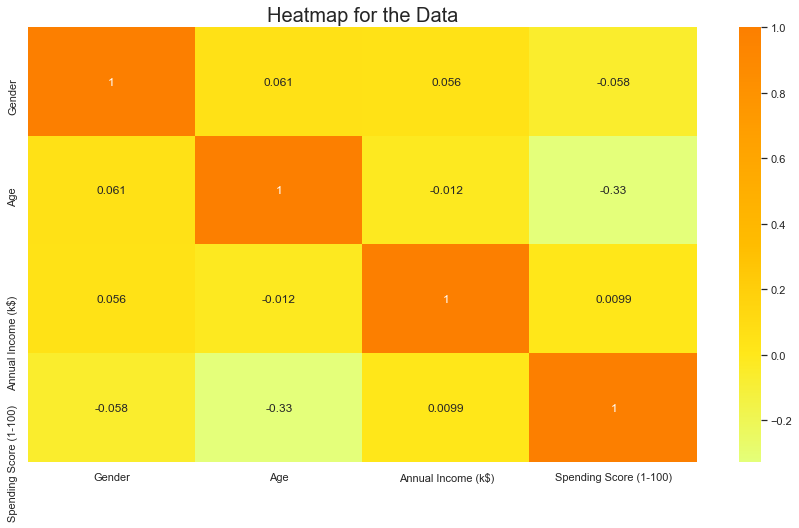

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [18]:
X = data.iloc[:,[2,3]].values

In [19]:
X.shape

(200, 2)

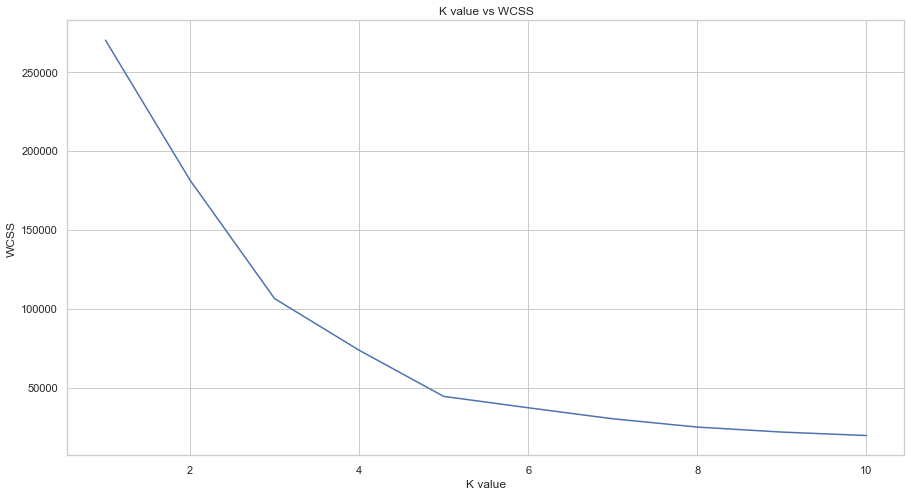

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('K value vs WCSS')
plt.show()

In [22]:
model = KMeans(n_clusters=5,random_state=0)
#model.fit(X)
y_pred = model.fit_predict(X)
print(y_pred)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [23]:
colors = ['green','yellow','blue','red','yellow']

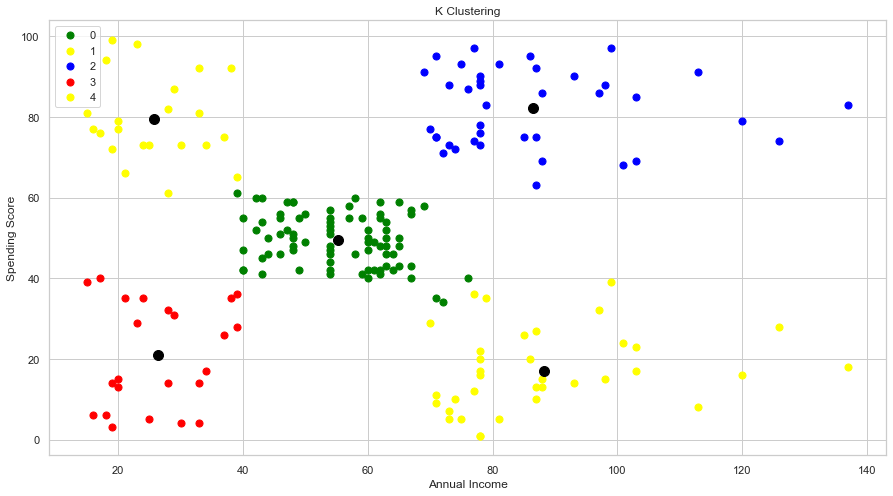

In [24]:
for i in range(5):
    #print(X[y_pred==i,0])
    plt.scatter(X[y_pred==i,0],X[y_pred==i,1],s = 50,c=colors[i])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100, color='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K Clustering')
plt.legend(range(5))
plt.show()